## Data Science Task

### 1. Extraction of Data:
The data was extracted using api of newsapi.org. One can register there and obtain the api-key to fire requests.
A python script is implemented to pull the json response and model the data as csv. All the information about the script is mentioned in depth in the document.

### 2. Data Cleaning and Analysis:
The data extracted in the format of csv is then converted to dataframe for analysis.
Pandas is used for the purpose to create a dataframe and note the data is also sampled to shuffle the data, so that is not contian some order.

Structure of the Dataframe:
<table class="w3-table">
<tr>
  <th>Name</th>
  <th>Author</th>
  <th>Title</th>
  <th>Description</th>
  <th>Url</th>
    <th>publishedAt</th>
  <th>Category</th>
    
</tr>
<tr>
  <td>Yahoo.com</td>
  <td>None</td>
  <td>Kraft Heinz lawsuit targets 3G stock transfer,..</td>
  <td>The proposed class-action lawsuit made public ..</td>
  <td>https://finance.yahoo.com/news/kraft-heinz-law..</td>
    <td>2019-02-28T18:11:00Z</td>
      <td>business</td>
</tr>
</table>

From this dataframe we do further analysis such as extraction of word_len and title_len from title and descriptions can be seen from notebook.

### 3. Interesting Visualizations
Some of interesting visualizations such as barplot,kdeplot,scatterplot,boxplot are shown on the text data.
For text in particular, wordCloud are shown. A logic for bagOfWords is written and then visualized

### 4. Some Clustering techniques such as LDA and Kmeans
Initially, Kmeans algorithm is applied TFIDFVectors and then LDA topicmodelling is applied and visualized.


# Requirements:
Libraries:
Visualization:
matplotlib, seaborn==0.9.0, yellowbrick, wordcloud

Data Processing:
pandas, numpy, nltk, string

Machine Learning:
sklearn, gensim, pyldavis

Used System Details:
Python: 3.X
OS: Windows 10

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
%matplotlib inline

## Read the data into python dataframe
Here, sample(frac=1) indicate that the data is shuffled while creating a dataframe

In [183]:
data = pd.read_csv('headlines.csv',sep='|').sample(frac=1).reset_index(drop=True)

In [184]:
sns.set_palette('rainbow')
sns.set_style('whitegrid')

## Head of Data

In [185]:
data.head()

,name,author,title,description,url,publishedAt,category
0,Inforum.com,None,Weekend 'catch-up sleep' is a lie - INFORUM,"news, sports, opinion, entertainment, business...",https://www.inforum.com/lifestyle/health/97889...,2019-02-28T18:00:00Z,general
1,Espn.com,None,Sources - Phillies finalizing deal with Harper...,The Phillies are finalizing a deal to land pri...,http://www.espn.com/mlb/story/_/id/26105394/so...,2019-02-28T20:23:44Z,sports
2,Espn.com,None,Vikings expecting big things from Cousins in '...,Vikings GM Rick Spielman and coach Mike Zimmer...,http://www.espn.com/nfl/story/_/id/26105422/vi...,2019-02-28T20:03:31Z,sports
3,Yahoo.com,None,"Kraft Heinz lawsuit targets 3G stock transfer,...",The proposed class-action lawsuit made public ...,https://finance.yahoo.com/news/kraft-heinz-law...,2019-02-28T18:11:00Z,business
4,Thetimes.co.uk,None,"Nick Kyrgios lacks respect for public, rivals ...",The behaviour of Nick Kyrgios has yet again ca...,https://www.thetimes.co.uk/article/nick-kyrgio...,2019-02-28T18:20:25Z,sports


## Size of the dataframe

In [186]:
len(data)

380

### Remove Duplicates of the dataset. It is seen that while extracting news there are lot of repeative news headlines

In [187]:
###Remove Duplicates
def processing(data):
    data.drop_duplicates(inplace=True)
    data = data[data.description!= 'None']

In [188]:
processing(data)

## Plot to show the frequency of data by category. Looks like it is equally distributed

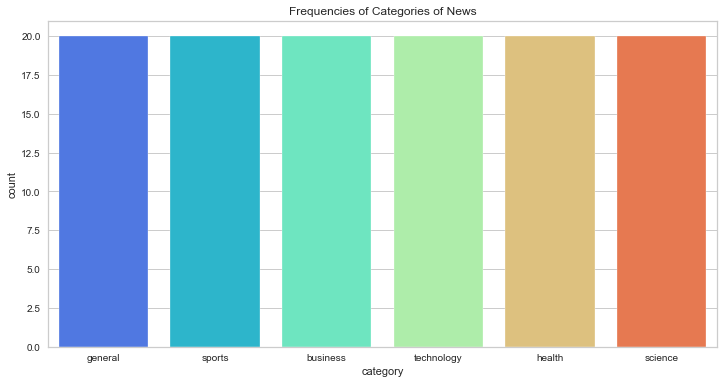

In [189]:
plt.figure(figsize=(12,6))
plt.title('Frequencies of Categories of News')
sns.countplot(x='category',data=data)

## Feature Engineering
1. Extracting Description Length and adding it as a column to the existing dataframe
2. Extraction word length and adding it as a column to the existing dataframe
3. Extraction title length and adding it as a column to the existing dataframe

In [190]:
data['desc_length'] = data.description.apply(len)
data['word_len'] = data.description.apply(lambda x: len(x.split(' ')))
data['title_len'] = data.title.apply(lambda x: len(x.split(' ')))

In [191]:
data.head(5)

,name,author,title,description,url,publishedAt,category,desc_length,word_len,title_len
0,Inforum.com,None,Weekend 'catch-up sleep' is a lie - INFORUM,"news, sports, opinion, entertainment, business...",https://www.inforum.com/lifestyle/health/97889...,2019-02-28T18:00:00Z,general,107,13,8
1,Espn.com,None,Sources - Phillies finalizing deal with Harper...,The Phillies are finalizing a deal to land pri...,http://www.espn.com/mlb/story/_/id/26105394/so...,2019-02-28T20:23:44Z,sports,123,21,9
2,Espn.com,None,Vikings expecting big things from Cousins in '...,Vikings GM Rick Spielman and coach Mike Zimmer...,http://www.espn.com/nfl/story/_/id/26105422/vi...,2019-02-28T20:03:31Z,sports,161,30,10
3,Yahoo.com,None,"Kraft Heinz lawsuit targets 3G stock transfer,...",The proposed class-action lawsuit made public ...,https://finance.yahoo.com/news/kraft-heinz-law...,2019-02-28T18:11:00Z,business,260,37,13
4,Thetimes.co.uk,None,"Nick Kyrgios lacks respect for public, rivals ...",The behaviour of Nick Kyrgios has yet again ca...,https://www.thetimes.co.uk/article/nick-kyrgio...,2019-02-28T18:20:25Z,sports,197,27,15


### Hex plot to show the title length and word len distribution
By seeing the plot is clearly understood that most of the headline title length correspond to description

C:\Users\subash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


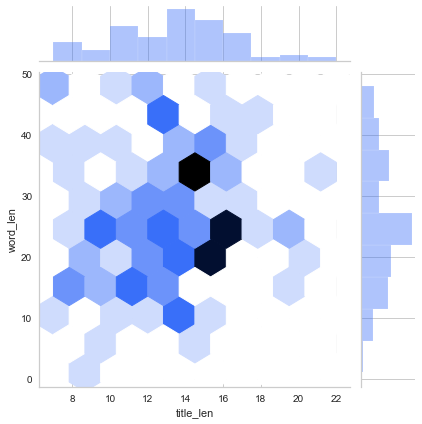

In [192]:
######
sns.jointplot(x='title_len', y='word_len', data=data, kind='hex')

## KDE plot to show the same relationship

C:\Users\subash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)
C:\Users\subash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


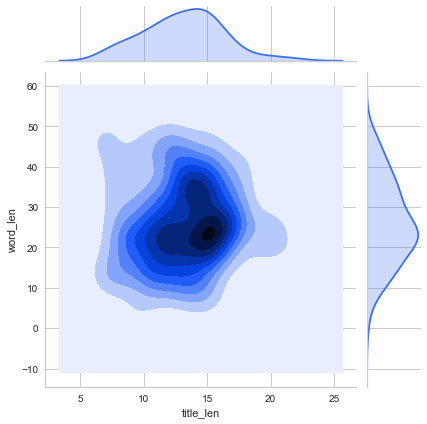

In [193]:
######
sns.jointplot(x='title_len', y='word_len', data=data,kind='kde')

### Scatter plot to plot the data points with respect to their category

No handles with labels found to put in legend.


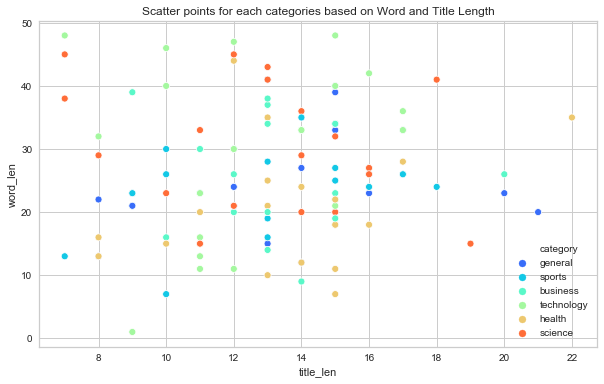

In [194]:
plt.figure(figsize=(10,6))
plt.legend(loc='best')
plt.title('Scatter points for each categories based on Word and Title Length')
sns.scatterplot(x='title_len',y='word_len',data=data,hue='category')

### A filtering logic to extract news names only and remove the domain

In [195]:
def filter_name(name):
    if '.' in name:
        return name.split('.')[0]
    else:
        return name

In [196]:
data['name'] = data['name'].apply(filter_name)

In [197]:
data.head(5)

,name,author,title,description,url,publishedAt,category,desc_length,word_len,title_len
0,Inforum,None,Weekend 'catch-up sleep' is a lie - INFORUM,"news, sports, opinion, entertainment, business...",https://www.inforum.com/lifestyle/health/97889...,2019-02-28T18:00:00Z,general,107,13,8
1,Espn,None,Sources - Phillies finalizing deal with Harper...,The Phillies are finalizing a deal to land pri...,http://www.espn.com/mlb/story/_/id/26105394/so...,2019-02-28T20:23:44Z,sports,123,21,9
2,Espn,None,Vikings expecting big things from Cousins in '...,Vikings GM Rick Spielman and coach Mike Zimmer...,http://www.espn.com/nfl/story/_/id/26105422/vi...,2019-02-28T20:03:31Z,sports,161,30,10
3,Yahoo,None,"Kraft Heinz lawsuit targets 3G stock transfer,...",The proposed class-action lawsuit made public ...,https://finance.yahoo.com/news/kraft-heinz-law...,2019-02-28T18:11:00Z,business,260,37,13
4,Thetimes,None,"Nick Kyrgios lacks respect for public, rivals ...",The behaviour of Nick Kyrgios has yet again ca...,https://www.thetimes.co.uk/article/nick-kyrgio...,2019-02-28T18:20:25Z,sports,197,27,15


### Top-5 news channels containning headlines

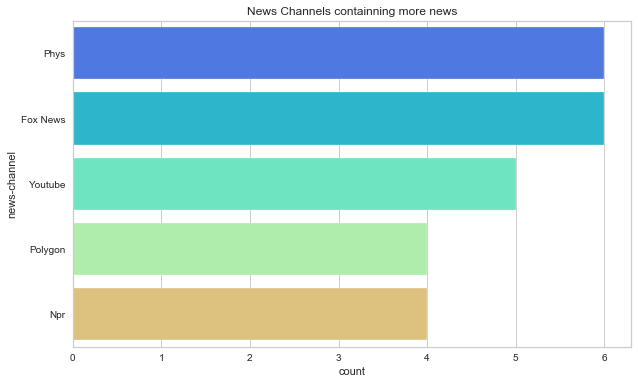

In [198]:
most_news = data.name.value_counts().head(5)
df = pd.DataFrame({
    'news-channel' : most_news.index,
    'count': most_news.values
})
plt.figure(figsize=(10,6))
plt.title('News Channels containning more news')
sns.barplot(x='count',y='news-channel',data=df)

C:\Users\subash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


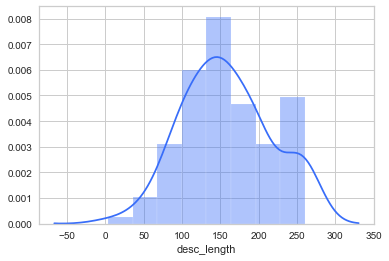

In [199]:
### Drop all description having very less length or too high
sns.distplot(data.desc_length,kde=True)

C:\Users\subash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


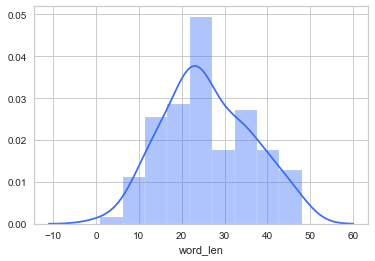

In [200]:
### Drop all description having very less length or too high
sns.distplot(data.word_len,kde=True)

In [201]:
data_1 = data[data.word_len >=3]

In [202]:
len(data_1)

119

In [203]:
from nltk.corpus import stopwords
import string
punctuations = '✔'
punctuations+=string.punctuation
def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in punctuations]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [204]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [205]:
data_1.description.head(5).apply(text_process)

0    [news, sports, opinion, entertainment, busines...
1    [Phillies, finalizing, deal, land, prized, fre...
2    [Vikings, GM, Rick, Spielman, coach, Mike, Zim...
3    [proposed, classaction, lawsuit, made, public,...
4    [behaviour, Nick, Kyrgios, yet, caused, contro...
Name: description, dtype: object

In [206]:
data_1.head(2)

,name,author,title,description,url,publishedAt,category,desc_length,word_len,title_len
0,Inforum,None,Weekend 'catch-up sleep' is a lie - INFORUM,"news, sports, opinion, entertainment, business...",https://www.inforum.com/lifestyle/health/97889...,2019-02-28T18:00:00Z,general,107,13,8
1,Espn,None,Sources - Phillies finalizing deal with Harper...,The Phillies are finalizing a deal to land pri...,http://www.espn.com/mlb/story/_/id/26105394/so...,2019-02-28T20:23:44Z,sports,123,21,9


In [207]:

#stopwords = stopwords.words('english')
#data_1['description'] = data_1['description'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))

In [208]:
data_1.head(5)

,name,author,title,description,url,publishedAt,category,desc_length,word_len,title_len
0,Inforum,None,Weekend 'catch-up sleep' is a lie - INFORUM,"news, sports, opinion, entertainment, business...",https://www.inforum.com/lifestyle/health/97889...,2019-02-28T18:00:00Z,general,107,13,8
1,Espn,None,Sources - Phillies finalizing deal with Harper...,The Phillies are finalizing a deal to land pri...,http://www.espn.com/mlb/story/_/id/26105394/so...,2019-02-28T20:23:44Z,sports,123,21,9
2,Espn,None,Vikings expecting big things from Cousins in '...,Vikings GM Rick Spielman and coach Mike Zimmer...,http://www.espn.com/nfl/story/_/id/26105422/vi...,2019-02-28T20:03:31Z,sports,161,30,10
3,Yahoo,None,"Kraft Heinz lawsuit targets 3G stock transfer,...",The proposed class-action lawsuit made public ...,https://finance.yahoo.com/news/kraft-heinz-law...,2019-02-28T18:11:00Z,business,260,37,13
4,Thetimes,None,"Nick Kyrgios lacks respect for public, rivals ...",The behaviour of Nick Kyrgios has yet again ca...,https://www.thetimes.co.uk/article/nick-kyrgio...,2019-02-28T18:20:25Z,sports,197,27,15


# Word Cloud Visualizations
Based on a given category the word cloud will be visualized

In [209]:
from wordcloud import WordCloud

In [210]:
def generateText(category,data):
    if category!=None:
        cat_data = data[data['category'] == category]
        text = ' '.join([text for text in cat_data.description])
        return text

## Generate Text for Word Cloud
1. For a given category. Example: science, general, business extract relevent data based on it and visualize the headlines as a wordcloud.
WorldCloud uses word counts to visualize most seen words in the data

In [211]:
text = generateText('science',data_1)

(-0.5, 399.5, 199.5, -0.5)

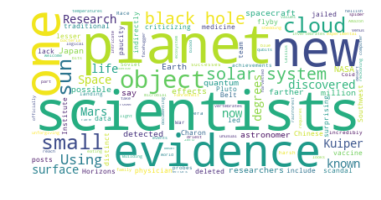

In [212]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### A boxplot to show against each category
It can be observed that sport category seems to have less length as compared to all others. And technology and science category seem to have the highest length with their medians and max being higher.
But, when it comes to the title it is other way around.

Some general observations about box plots:
1. The box plot is comparatively short for sports indicating that all the headlines are almost of equal length.

2. The box plot is comparatively tall for technology and science indicating that the length of news are quite different as compared to others

3. Business category and general category have equal medians but their distributions are quite different.

Some of important links to follow on box plot are: <br/>
-> https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots <br/>
-> https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review



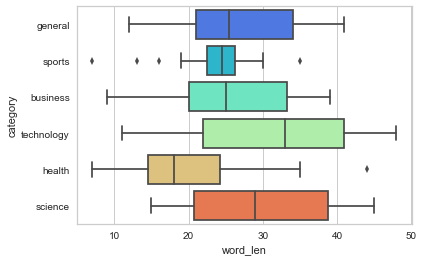

In [213]:
sns.boxplot(x='word_len',y='category',data=data_1)

### Same interpretations can be made even on the title

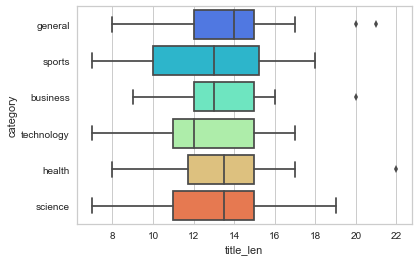

In [214]:
sns.boxplot(x='title_len',y='category',data=data_1)

### zipf's Law:
Zipfs law state that high the term frequency lesser its rank. Ideally that is what has happen. The stopwords seems to have lower rank because they are very frequent as compared to that with the rarely occurring terms.

In [215]:
##Tf
### Term Frequency = Number of times the word has occured in the document
word_freq = {}
def termFrequency(x):
    for word in x.split():
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] = word_freq.get(word) + 1

In [216]:
for text in data_1.description:
    termFrequency(text)

In [217]:
tf1 = pd.DataFrame(list(word_freq.items()),columns=['word','freq'])

In [218]:
tf1['rank'] = tf1.freq.apply(lambda x:(1/x))

<h5> As seen from the below table it is clear that highly frequent terms are stopwords and are having lower rank </h5>

In [219]:
tf1.sort_values(by='freq',ascending=False).head(5)

,word,freq,rank
68,the,159,0.006289
81,of,85,0.011765
17,a,78,0.012821
19,to,73,0.013699
8,and,58,0.017241


In [220]:
tf1.sort_values(by='freq',ascending=False).tail(5)

,word,freq,rank
723,cancer,1,1.0
722,form,1,1.0
721,same,1,1.0
720,developed,1,1.0
1612,planet.,1,1.0


### Bag Of Words
Logic for implementation of bag of words is done.

Theory:
Bag Of words is the most common model used in the natural language to process data and visualize.

Example:
    d1: John likes watching movies. Mary too likes watching movies
    d2: John loves to play football
        
Bag of words for d1 and d2 are:
    1. Split sentences into words.
    2. Apply logic to compute counts. Ideally a dictionary data structure is constructed for this.
   <br/>
    BoW1: {"John":1,"likes":2,"watching":2,"movies":2,"Mary":1,"too":1}<br/>
    BoW2: {"John":1,"loves":1,"to":1,"play":1,"football":1}
<br/><br/>
    The Bag-of-words do not have any semantics meaning the order is not maintained. Union of bag-of-words is also possible.
   <br/>
        BoW = BoW1 U BoW2
    <br/><br/>
    
Logic:
    A logic is written to compute bag-of-words for each description considering them as document and is added into a list. The top words of the document is visualized.

In [221]:
#### BAG OF WORDS #################
bagOfWords = []
def calcBagOfWords(wordList):
    dict = {}
    for word in wordList.split():
        if word not in stopwords.words('english'):
            if word not in dict:
                dict[word] = 1
            else:
                dict[word] = dict.get(word) + 1
    bagOfWords.append(dict)

In [222]:
for wordList in data_1.description:
    calcBagOfWords(wordList)

In [223]:
bagOfWords[0]

{'news,': 1,
 'sports,': 1,
 'opinion,': 1,
 'entertainment,': 1,
 'business,': 1,
 'lifestyle,': 1,
 'milestones,': 1,
 'obituaries': 1,
 'weather': 1,
 'Fargo,': 1,
 'ND': 1}

In [224]:
def visualize(bagOfWordsDict):
    wc = WordCloud(background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(bagOfWordsDict)
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [225]:
### Finding the document with max word count
def docMaxBagOfWords():
    max_ = sum(bagOfWords[0].values())
    for i in range(1,len(bagOfWords)):
        if max_ < sum(bagOfWords[i].values()):
            max_ = sum(bagOfWords[i].values())
            index_ = i
    return max_,index_

In [226]:
max_,index_ = docMaxBagOfWords()

In [227]:
print('The maximum sum of the bag-of-words is ' + str(max_))
print('The maximum index of the bag-of-words is ' + str(index_))

The maximum sum of the bag-of-words is 30
The maximum index of the bag-of-words is 112


# Visualize the bag-of-word with max sum

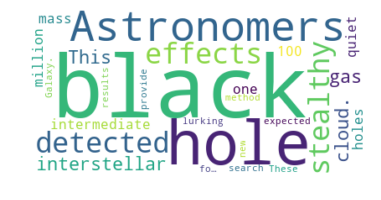

In [228]:
visualize(bagOfWords[index_])

## Visualizing some of the bagOfWords together

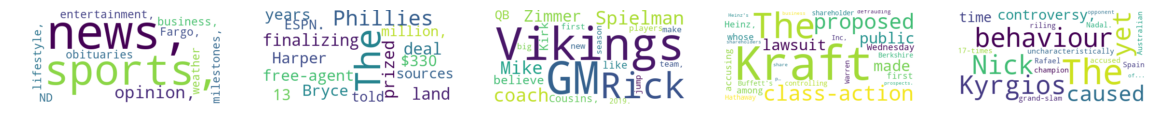

In [229]:
fig,ax = plt.subplots(1,5,figsize=(20,15))
for i in range(0,5):
    wc = WordCloud(background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(bagOfWords[i])
    # show
    ax[i].imshow(wc, interpolation="bilinear")
    ax[i].axis("off")

### Time to Action - Clustering Headlines with Kmeans
<br/>
Using sklearn kmeans algorithm is applied. The basic idea behind kmeans algorithm is to provide a number of cluster centers at the beginning (or choose randomly using elbow method) and apply euclidean distance from the centroid to the data points to see which are closest. Data points for the text are nothing but the TFIDF vectors. Here in this case clusters are choosen to be 3 and kmeans is applied on it.<br/>
<br/>
What is TFIDF ?<br/>
TF - Term Frequency and IDF - Inverse Document Frequency.
<br/><br/>
Term Frequency is the number of time the term occurs in each document; and its occurance in the overall document.
Inverse Document frequency is the idea to penalize most common terms and give higher weights to rare terms.
<br/><br/>
Reference:<br/>
1. https://en.wikipedia.org/wiki/Tf–idf  <br/>
Kmeans Reference of the sklearn implementation: <br/>
1. https://scikit-learn.org/0.18/auto_examples/text/document_clustering.html

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

In [231]:
vectorizer = TfidfVectorizer(min_df=1,analyzer=text_process,
                                 use_idf=True)
X = vectorizer.fit_transform(data_1.description)
true_k=16

In [232]:
print("n_samples: %d, n_features: %d" % X.shape)
print()

n_samples: 119, n_features: 1397



In [233]:
'''
print("Performing dimensionality reduction using LSA")
# Vectorizer results are normalized, which makes KMeans behave as
# spherical k-means for better results. Since LSA/SVD results are
# not normalized, we have to redo the normalization.
svd = TruncatedSVD(n_components=3)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(X)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
int(explained_variance * 100)))
'''

'\nprint("Performing dimensionality reduction using LSA")\n# Vectorizer results are normalized, which makes KMeans behave as\n# spherical k-means for better results. Since LSA/SVD results are\n# not normalized, we have to redo the normalization.\nsvd = TruncatedSVD(n_components=3)\nnormalizer = Normalizer(copy=False)\nlsa = make_pipeline(svd, normalizer)\nX = lsa.fit_transform(X)\nexplained_variance = svd.explained_variance_ratio_.sum()\nprint("Explained variance of the SVD step: {}%".format(\nint(explained_variance * 100)))\n'

In [234]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=0)

### Using yellowbricks library which goes very well with sklearn to visualize the right K for kmeans suing elbow method

<p>
    Elbow Method: The idea is to choose k where is seems to go down. From the graph it can be seen that at 3 there is a elbow shaped graph going down</p>
    
Reference:
1. https://www.scikit-yb.org/en/latest/quickstart.html </br>

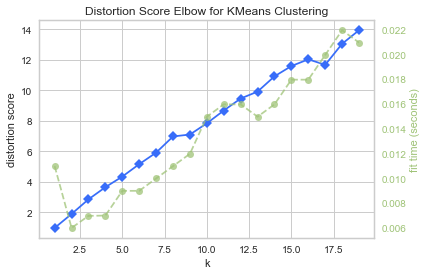

In [235]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(km, k=(1,20))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

In [236]:
print("Clustering sparse data with %s" % km)
km.fit(X)
print()

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=19, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)



In [237]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
print("Top terms per cluster:")
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end=',')
    print()

Top terms per cluster:
Cluster 0: Pokemon, price, 5, Baseball, Major, Official, Site, League, Shield, Sword, Company, shoots, Ricohs, gives, professional, images, RAW, 360degree, Z1, Theta,
Cluster 1: black, Back, Groove, hole, fo…, March, 1, one, new, items, dropping, Anthem, Inscriptions, rarity, perfect, Getting, coming, harder, lower, Masterworks,
Cluster 2: Thursday, US, plans, investors, reports, Administration, comments, head, results, tarmac, recalling, Co, 534000, fires, Motor, Kia, vehicles, around, engine, Corp,
Cluster 3: One, Xbox, Switch, PS4, players, 8, PC, Izneo, Manga, graphic, novels, degrees, Devil, May, Cry, brings, 5, dig, plenty, finally,
Cluster 4: …, new, Night, approaching, promo, art, King, characters, showcasing, HBO, Thrones”, “Game, Twitter, discussed, Tim, leaders, look, management, Cook, molding,
Cluster 5: small, scientists, evidence, regions, China, endangering, worldwide, near, change, fish, populations, coastal, shrinking, Climate, series, Japan, 35,

### LDA Visualization

Theory:
LDA - Latent Dirchlet allocation, is a probablistic approach where in each topic can be viewed as mixture of various topics containing words in them. This is a probablistic approach to assign words to a topic with maximum relevance being to one. There are multiple variations to the model and has many hyperparameters which are not assessed in this assigned.

Libraries which helps to build LDA in python:
1. gensim - This is a very useful library and is very powerful for text processing.
2. pyldavis - Applies the lda visualization ideally first introduced in R. It goes very hand in hand with gensim.

References: <br/>
1. https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ </br>
2. https://github.com/bmabey/pyLDAvis </br>




In [238]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

In [239]:
descriptions = data_1.description.apply(text_process)
dictionary = Dictionary(descriptions)
corpus = [dictionary.doc2bow(text) for text in descriptions]

In [240]:
lda = LdaModel(corpus=corpus,id2word=dictionary,num_topics=10
               ,random_state=212,update_every=5,chunksize=100,passes=20,alpha='auto',
                                           per_word_topics=True)

In [241]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[-1:]]

[[('new', 1),
  ('two', 1),
  ('evidence', 1),
  ('scientists', 1),
  ('researchers', 1),
  ('released', 1),
  ('solar', 1),
  ('system', 1),
  ('planet', 2),
  ('possible', 1),
  ('Caltech', 1),
  ('detail', 1),
  ('large', 1),
  ('location', 1),
  ('makeup', 1),
  ('ninth', 1),
  ('papers', 1),
  ('possibility', 1)]]

In [242]:
# Print the Keyword in the 10 topics
#pprint(lda.print_topics())

In [243]:
# Compute Perplexity
print('\n Perplexity= ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the value better.

# Coherence Score computatoin
coherence_model_lda = CoherenceModel(model=lda, texts=descriptions, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Coherence Score= ', coherence_lda)


 Perplexity=  -7.5778855635557925

 Coherence Score=  0.48550559428338147


In [244]:
import pyLDAvis
from pyLDAvis import gensim, prepare
pyLDAvis.enable_notebook()

In [245]:
gensim.prepare(lda,corpus,dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      15.617708        1       1 -0.222113  0.014700
7      13.731758        1       2  0.031167 -0.130553
0      11.320623        1       3  0.050602  0.054133
8      11.312258        1       4  0.038603  0.165650
4       9.735972        1       5  0.014302 -0.035699
1       9.566588        1       6  0.032540 -0.032764
5       8.456860        1       7  0.016586 -0.025993
9       7.778192        1       8  0.009821 -0.004544
2       7.353405        1       9  0.026898  0.010294
6       5.126635        1      10  0.001593 -0.015224, topic_info=     Category      Freq           Term      Total  loglift  logprob
term                                                               
45    Default  5.000000         season   5.000000  30.0000  30.0000
250   Default  4.000000           year   4.000000  29.0000  29.0000
753   Default  2.000000            day   2.000000  28.0000  28.0000
107   Default  3.000000              —   3.000000  27.0000  27.0000
25    Default  4.000000          years   4.000000  26.0000  26.0000
188   Default  5.000000     scientists   5.000000  25.0000  25.0000
46    Default  6.000000           team   6.000000  24.0000  24.0000
990   Default  3.000000        company   3.000000  23.0000  23.0000
1102  Default  3.000000         screen   3.000000  22.0000  22.0000
1090  Default  3.000000            S10   3.000000  21.0000  21.0000
290   Default  2.000000    researchers   2.000000  20.0000  20.0000
448   Default  2.000000           play   2.000000  19.0000  19.0000
14    Default  2.000000           ESPN   2.000000  18.0000  18.0000
182   Default  3.000000       evidence   3.000000  17.0000  17.0000
148   Default  7.000000       Thursday   7.000000  16.0000  16.0000
213   Default  3.000000           says   3.000000  15.0000  15.0000
983   Default  2.000000         planet   2.000000  14.0000  14.0000
286   Default  1.000000          could   1.000000  13.0000  13.0000
189   Default  3.000000          small   3.000000  12.0000  12.0000
1377  Default  2.000000            I’m   2.000000  11.0000  11.0000
636   Default  2.000000         former   2.000000  10.0000  10.0000
493   Default  2.000000       released   2.000000   9.0000   9.0000
289   Default  1.000000           help   1.000000   8.0000   8.0000
874   Default  2.000000         object   2.000000   7.0000   7.0000
2     Default  2.000000       business   2.000000   6.0000   6.0000
397   Default  2.000000       comments   2.000000   5.0000   5.0000
403   Default  3.000000         latest   3.000000   4.0000   4.0000
119   Default  2.000000              X   2.000000   3.0000   3.0000
524   Default  3.000000          black   3.000000   2.0000   2.0000
120   Default  2.000000           Xbox   2.000000   1.0000   1.0000
...       ...       ...            ...        ...      ...      ...
883   Topic10  0.460156     Nintendogs   0.989169   2.2054  -5.3841
887   Topic10  0.460156          youve   0.989169   2.2054  -5.3841
284   Topic10  0.460156         Rodent   0.989169   2.2054  -5.3841
285   Topic10  0.460156  communication   0.989169   2.2054  -5.3841
287   Topic10  0.460156      disorders   0.989169   2.2054  -5.3841
288   Topic10  0.460156      exchanges   0.989169   2.2054  -5.3841
291   Topic10  0.460156     understand   0.989169   2.2054  -5.3841
292   Topic10  0.460156          vocal   0.989169   2.2054  -5.3841
1125  Topic10  0.460156          foods   0.989169   2.2054  -5.3841
166   Topic10  0.460156      scheduled   0.989169   2.2054  -5.3841
1127  Topic10  0.460156        science   0.989169   2.2054  -5.3841
1128  Topic10  0.460156            top   0.989169   2.2054  -5.3841
1126  Topic10  0.460156           keep   0.989169   2.2054  -5.3841
1124  Topic10  0.460156     cancerfree   0.989169   2.2054  -5.3841
1123  Topic10  0.460156           body   0.989169   2.2054  -5.3841
286   Topic10  0.878408          could   1.91

### Conclusion

As part of this task, below are achieved results:
    1. A extraction mechanism is implemented to extract api response and convert to json of relevant column
    2. A analysis jupyter notebook is written to analyse the data, perform some useful clustering techniques